<h1>JOBarcelona ’22 | Data Science</h1>

<h3> Juan Sirai </h3>

<img src="img/banner.gif"  width=800>

Este es uno de los retos clasificatorios que forman parte del hackathon online de JOBarcelona ’22. El resultado de este reto va a permitir a los ganadores asistir al hackathon presencial que se realizará el día 31 de mayo de 2022 en el Camp Nou

----------------------------------------------------------------------------------------

<h2>Background</h2>

Los insectos nocturnos representan uno de los grupos más diversos de organismos, por lo que es de suma importancia estudiarlos.

Es por ello que un grupo de prestigiosos entomólogos han construido un ecosistema aislado con múltiples especies para poder estudiarlos en mayor detalle. Para este estudio están diseñando un sistema de sensores para poder trackear de forma automática las dinámicas y hábitos de estos insectos.

<h2>Overview: the dataset and challenge</h2>

Se emplearán dos datasets:

`Training`
El primero contiene datos de las mediciones de los sensores, el tiempo de las mediciones y el tipo de insecto identificado.

El dataset de clientes 'train.csv' contiene las siguientes variables:
* Hour: Hora a la que se ha hecho la medición.
* Minutes: Minutos en los que se ha realizado la medición.
* Sensor_alpha: Posición del insecto al sensor alpha.
* Sensor_beta: Posición del insecto al sensor beta.
* Sensor_gamma: Posición del insecto al sensor gamma.
* Sensor_alpha_plus: Posición del insecto al sensor alpha+.
* Sensor_beta_plus: Posición del insecto al sensor beta+.
* Sensor_gamma_plus: Posición del insecto al sensor gamma+.
* Insect: Categoría de insecto.
    * 0 -> Lepidoptero
    * 1 -> Himenoptera
    * 2 -> Diptera
    
<h2>¿Qué se debe entregar?</h2>

Tienes que entregar el link de tu repositorio de Github/Gitlab.

Este tiene que tener:
* El código con el que has realizado el EDA y el modelo predictivo.
* Un archivo 'results.csv' con las predicciones de tu algoritmo al meterle como input el dataset test_x. Este archivo con los resultados ha de tener una columna con el índice y otra con las predicciones del 'Insect'.

-------------------------------------------------------------------

## 🚀 Librerias Necesarias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

## 🚀 Analisis Preliminar

In [2]:
data = pd.read_csv('data/train.csv')
data.head(10)

,Unnamed: 0,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,0,22,26,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0
2,2,21,42,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1
3,3,21,17,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0
4,4,18,16,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2
5,5,21,23,-46.761031,237.863074,208.008700,-125.729185,-33.298749,-1.362840,1
6,6,21,10,108.268101,-26.196569,-96.568491,117.432706,-96.707760,70.639947,0
7,7,7,34,-103.673329,-234.696711,-103.499400,98.081187,-28.156253,45.068583,0
8,8,20,12,-146.492155,12.444229,-42.473037,60.356941,-73.822742,-31.022915,0
9,9,21,1,-60.924066,-66.598591,-63.173520,-104.830957,123.155306,158.866955,1


In [3]:
print("Proporcion de valores nulos: ")
data.isnull().sum() / data.shape[0]

Proporcion de valores nulos: 


Unnamed: 0           0.0
Hour                 0.0
Minutes              0.0
Sensor_alpha         0.0
Sensor_beta          0.0
Sensor_gamma         0.0
Sensor_alpha_plus    0.0
Sensor_beta_plus     0.0
Sensor_gamma_plus    0.0
Insect               0.0
dtype: float64

In [4]:
print("Medidas estadisticas de variables cuantitativas")
data.describe().round(0).transpose()

Medidas estadisticas de variables cuantitativas


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,7001.0,3500.0,2021.0,0.0,1750.0,3500.0,5250.0,7000.0
Hour,7001.0,20.0,4.0,1.0,19.0,21.0,21.0,23.0
Minutes,7001.0,29.0,17.0,0.0,14.0,29.0,44.0,59.0
Sensor_alpha,7001.0,0.0,99.0,-405.0,-69.0,-0.0,66.0,351.0
Sensor_beta,7001.0,-30.0,133.0,-656.0,-116.0,-36.0,57.0,518.0
Sensor_gamma,7001.0,-6.0,116.0,-448.0,-84.0,-1.0,77.0,378.0
Sensor_alpha_plus,7001.0,7.0,122.0,-437.0,-79.0,-1.0,93.0,463.0
Sensor_beta_plus,7001.0,-1.0,100.0,-388.0,-68.0,-0.0,66.0,345.0
Sensor_gamma_plus,7001.0,-1.0,101.0,-375.0,-70.0,0.0,68.0,364.0
Insect,7001.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0


In [5]:
print("Verificamos tipos de datos: ")
data.dtypes

Verificamos tipos de datos: 


Unnamed: 0             int64
Hour                   int64
Minutes                int64
Sensor_alpha         float64
Sensor_beta          float64
Sensor_gamma         float64
Sensor_alpha_plus    float64
Sensor_beta_plus     float64
Sensor_gamma_plus    float64
Insect                 int64
dtype: object

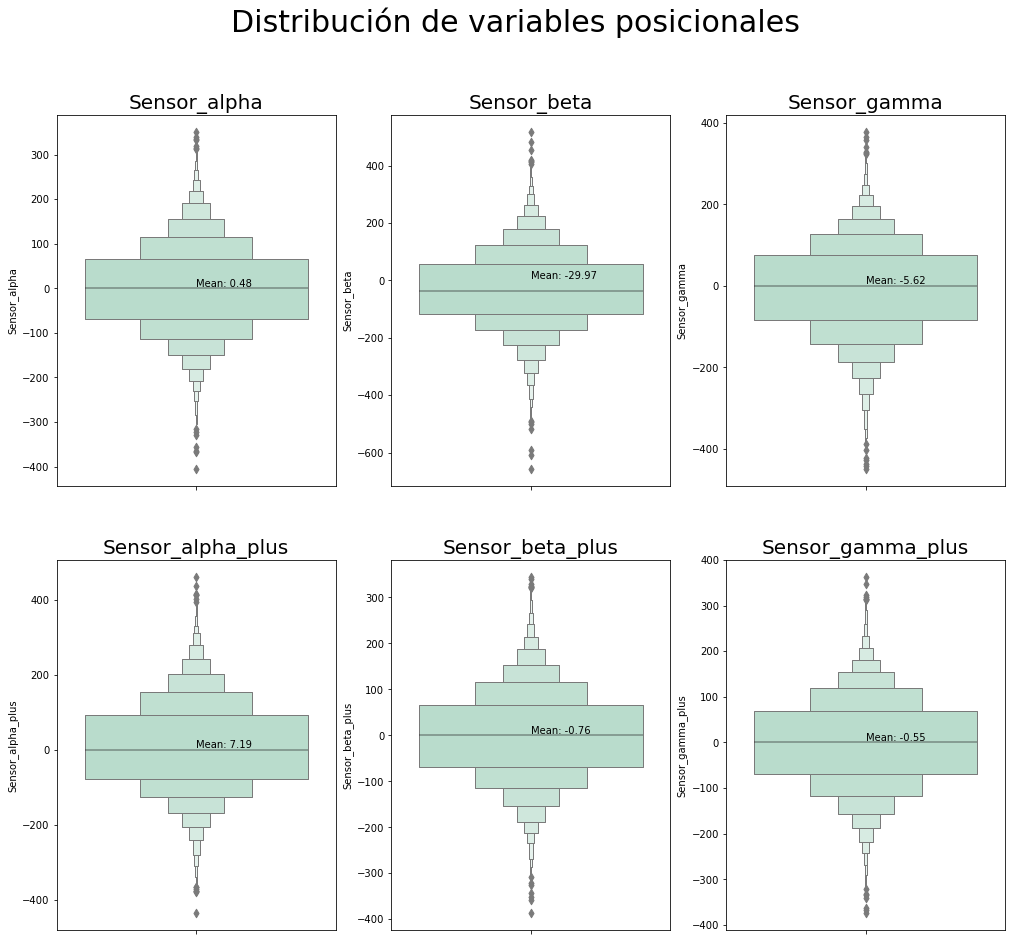

In [6]:
fig, axis=plt.subplots(2,3,figsize=(17,15))
columna = 0
fila = 0
variables = list(data.columns)[3:-1]
plt.suptitle('Distribución de variables posicionales',fontsize=30)
for col in variables:
    axis[fila,columna].set_title(col, size=20)
    box = sns.boxenplot(y = col, data = data, ax=axis[fila, columna], palette='Pastel2')
    box.annotate(f"Mean: {data[col].mean().round(2)}", xy=(0,0), verticalalignment='bottom')
    if columna == 2:
        columna = 0
        fila+=1
    else:
        columna+=1

---------------------------------------------------------------------------

### Variables posicionales

Vamos a analizar en promedio que valores posicionales tiene cada uno de los insectos.
A fin de evitar distorsiones por diferencias de escala, generaremos un nuevo dataset con los valores estandarizados de las variables posicionales

In [7]:
X=data[variables]

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X);
data_scaled = pd.DataFrame(X_scaled, columns = variables)
df_aux = pd.concat([data_scaled,data['Insect']], axis=1)

df_aux

,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,1.202906,2.049902,-2.685881,1.986662,-0.527728,-1.109090,2
1,-0.919224,-1.799568,-1.527295,0.721120,0.380375,0.488216,0
2,-0.206523,-0.879855,0.482514,-0.800679,-0.497026,0.855014,1
3,-0.218917,0.228734,-0.695126,-0.237098,-2.084307,0.167578,0
4,-0.590523,0.127158,-1.302196,0.336863,-1.092156,-0.096794,2
...,...,...,...,...,...,...,...
6996,0.061427,2.487307,1.314547,-1.771339,-1.289767,-0.504052,1
6997,-0.066942,-2.161602,-1.346586,1.969172,-1.118323,0.994924,0
6998,-0.078226,-2.830948,-1.782039,1.974808,1.176130,0.331852,0
6999,-0.934599,-1.214113,0.811267,0.257854,-0.382802,0.208013,0


In [8]:
promedios = df_aux.groupby('Insect').mean()[variables]
promedios

,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus
Insect,,,,,,
0,-0.010244,-0.322844,0.044408,0.510815,-0.007240,-0.006092
1,0.011834,0.205347,0.089493,-0.628096,0.017909,0.017722
2,0.004346,0.816480,-0.589589,-0.062823,-0.035620,-0.040727


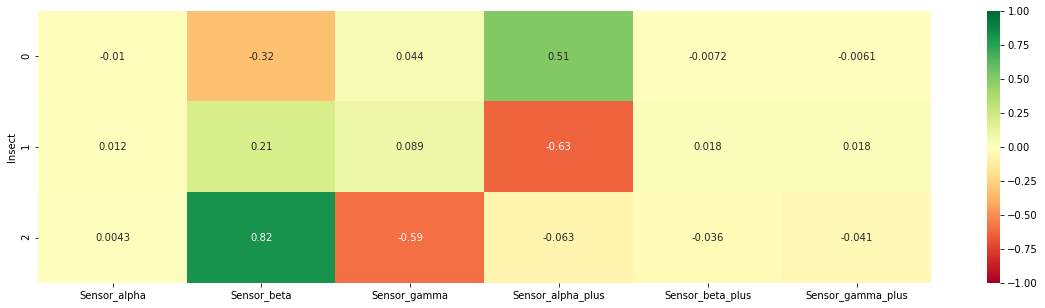

In [9]:
plt.figure(figsize=(20,5))
sns.heatmap(promedios, annot = True, vmin = -1, vmax = 1, cmap='RdYlGn');

Como podemos ver en el mapa de calor, en promedio nuestras 3 especies de insectos mantienen valores muy similares para las variables 'Sensor_alpha', 'Sensor_beta_plus' y 'Sensor_gamma_plus', pero muestran marcadas diferencias en:
* 'Sensor_beta'
* 'Sensor_gamma'
* 'Sensor_alpha_plus'

Para un análisis mas simplificado, podríamos intentar incluso trabajar con esas 3 features como baseline

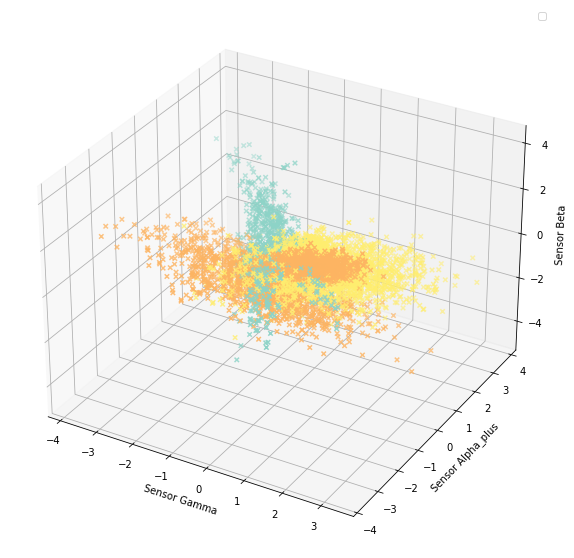

In [10]:
labels = list(df_aux['Insect'].unique())

plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
#ax.view_init(40, 80)
# Labels

ax.set_xlabel("Sensor Gamma")

ax.set_ylabel("Sensor Alpha_plus")

ax.set_zlabel("Sensor Beta")
# Data for three-dimensional scattered points
zdata = df_aux['Sensor_beta']
xdata = df_aux['Sensor_gamma']
ydata = df_aux['Sensor_alpha_plus']

ax.legend( labels, loc='best')


ax.scatter3D(xdata, ydata, zdata, c=df_aux['Insect'], cmap='Set3_r', marker="x");

----------------------------------------------------------------------------
### Distribucion temporal

Para este análisis, veremos si existen diferencias significativas en los horarios en los cuales se registran las observaciones de las distintas clases de insectos

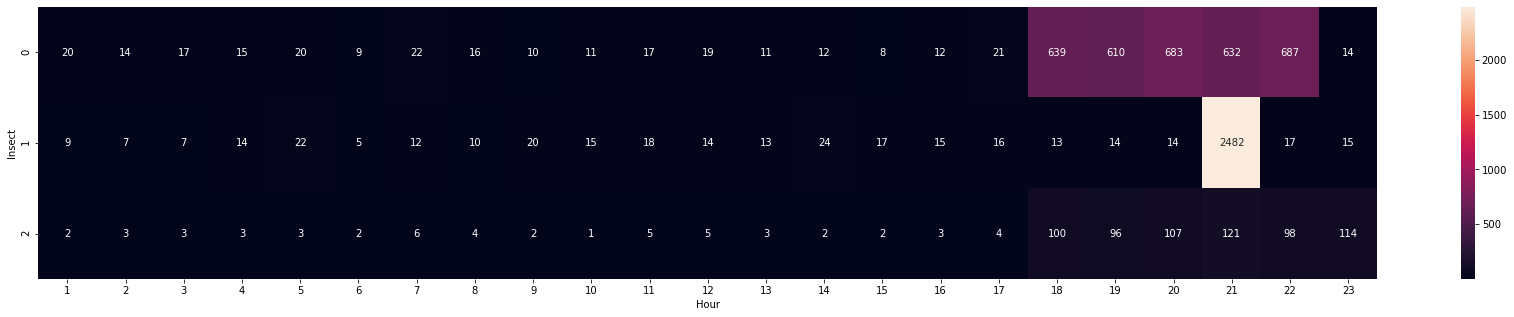

In [11]:

data_por_hora = data.pivot_table(values = 'Unnamed: 0',
                                 index=data['Insect'],columns=data['Hour'], 
                                 aggfunc={'Unnamed: 0':'count'})

plt.figure(figsize=(30,5))

sns.heatmap(data_por_hora, annot = True,fmt='g');

Algo interesante que notamos en la imagen, es que:
* Los insectos de tipo 0 aparecen mayoritariamente de 18 a 22 horas 🌟
* Los insectos de tipo 1 tienen un pico muy maracado a las 21 hs 🤔
* Los insectos de tipo 2, si bien son la clase minoritaria, son los únicos que permanecen despiertos hasta las 23 😜

## 🚀 Transformaciones de datos

Como vimos en el analisis inicial, el dataset de entrenamiento está muy limpio en términos de valores nulos, con lo cual procederemos solamente a eliminar algunas columnas innecesarias (por ejemplo la de indice) y realizar unas pequeñas transformaciones sobre las existentes.
* Estandarización de variables
* Separación en X e Y
* Separacion en train y test set

Partiremos del dataset original

In [12]:
data.head(2)

,Unnamed: 0,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,0,22,26,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0


Quitaremos la serie Unnamed, y las variables de sensores que no presentaban tantas diferencias respecto a tipos de insectos

In [13]:
data_clean = data.drop(labels=['Unnamed: 0','Sensor_alpha','Sensor_beta_plus','Sensor_gamma_plus','Minutes'], axis=1)
data_clean.head(2)

,Hour,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Insect
0,22,242.838324,-316.819222,250.195048,2
1,10,-269.470767,-182.581844,95.394941,0


In [14]:
X = data_clean.drop(columns=['Insect'])
y = data_clean.Insect

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
y_train.value_counts()

0    2823
1    2234
2     543
Name: Insect, dtype: int64

Debido a que tenemos muy pocas observaciones de la clase 2, vamos a proceder a generar muestras random de la clase minoritaria

In [16]:
from imblearn.over_sampling import RandomOverSampler

oversampler=RandomOverSampler(sampling_strategy='minority');

X_train_os, y_train_os=oversampler.fit_resample(X_train,y_train);

print('training set:')
print(y_train_os.value_counts())



training set:
2    2823
0    2823
1    2234
Name: Insect, dtype: int64


Vamos a estandarizar nuevamente las variables, para evitar diferencias de escala.

> En este punto estuve dudando si conceptualmente correspondía estandarizar la variable hora, o directamente tratarla como una variable categórica convirtiendola a Dummy. Si bien la decisión de estandarizar o no variables tiene sus bemoles, y hay mucho debate en torno a cuándo y cómo, tomé la decisión de estandarizarla en conjunto con las variables sensoriales ya que en definitiva me interesaba la continuidad de la misma (por eso no la convierto a dummy), y por otro lado tiene una escala completamente diferente a las demás.

In [17]:
scaler_f=StandardScaler()
X_train_sc = scaler_f.fit_transform(X_train_os)
X_test_sc = scaler_f.transform(X_test)

## Algoritmos

### Random Forest Classifier

In [18]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_sc, y_train_os)
pred_rfc = rfc.predict(X_test_sc)

In [19]:
# Veamos como performa el modelo
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       696
           1       0.93      0.93      0.93       559
           2       0.76      0.62      0.68       146

    accuracy                           0.89      1401
   macro avg       0.86      0.83      0.84      1401
weighted avg       0.89      0.89      0.89      1401



### Stochastic Gradient Decent Classifier

In [20]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train_sc, y_train_os)
pred_sgd = sgd.predict(X_test_sc)

In [21]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73       696
           1       0.76      0.43      0.55       559
           2       0.30      0.64      0.41       146

    accuracy                           0.62      1401
   macro avg       0.59      0.62      0.57      1401
weighted avg       0.68      0.62      0.63      1401



### Support Vector Classifier

In [22]:
svc = SVC()
svc.fit(X_train_sc, y_train_os)
pred_svc = svc.predict(X_test_sc)

In [23]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.91      0.81      0.85       696
           1       0.85      0.89      0.87       559
           2       0.56      0.77      0.65       146

    accuracy                           0.84      1401
   macro avg       0.77      0.82      0.79      1401
weighted avg       0.85      0.84      0.84      1401



### Gradient Boost Classifier

In [24]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_sc, y_train_os)
pred_gbc = gbc.predict(X_test_sc)

In [25]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       696
           1       0.91      0.94      0.92       559
           2       0.62      0.75      0.68       146

    accuracy                           0.88      1401
   macro avg       0.81      0.85      0.83      1401
weighted avg       0.88      0.88      0.88      1401



### Grid Search Cv

Intentaremos mejorar la accuracy de nuestro modelo Random Forest

In [29]:
param_grid = { 
    'n_estimators': [250, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_sc, y_train_os)
pred_cv_rfc = CV_rfc.predict(X_test_sc)

In [30]:
print(classification_report(y_test, pred_cv_rfc))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       696
           1       0.90      0.92      0.91       559
           2       0.63      0.70      0.66       146

    accuracy                           0.87      1401
   macro avg       0.81      0.83      0.82      1401
weighted avg       0.87      0.87      0.87      1401



Luego de los análisis realizados sobre el set de train y validacion, vemos que el modelo con mejores resultados es el de random forest, el cual utilizaremos para la predicción final

## Predicción

In [33]:
data_real = pd.read_csv('data/test_x.csv')
data_real.head(2)

,Unnamed: 0,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus
0,7000,21,31,-72.083585,-11.434977,-52.961743,-72.696385,145.299227,-143.856243
1,7001,21,3,-193.619980,40.137081,85.419244,-26.266801,-125.391237,80.904973


In [34]:
data_real_clean = data_real.drop(labels=['Unnamed: 0','Sensor_alpha','Sensor_beta_plus','Sensor_gamma_plus','Minutes'], axis=1)
data_real_clean.head(2)

,Hour,Sensor_beta,Sensor_gamma,Sensor_alpha_plus
0,21,-11.434977,-52.961743,-72.696385
1,21,40.137081,85.419244,-26.266801


In [35]:
X_real_sc = scaler_f.transform(data_real_clean)

In [36]:
predicciones = rfc.predict(X_real_sc)

Guardamos las predicciones en un df

In [40]:
data_final = pd.DataFrame(predicciones,columns=['Insect'])

In [44]:
data_final.to_csv('resultados/results.csv',index=False)

<img src="https://img.freepik.com/vector-gratis/correo-electronico-gracias-banner-ilustracion-plana-tarjeta-felicitacion-sobre-texto-gracias-vector-fondo_2175-1525.jpg" width=800>